# Lab 7 - Clustering
### SENG 474/503
### March 9th, 2023
### TA: Jonas Buro

## Introduction
Clustering is a type of unsupervised learning, wherein patterns in data are identified without the use of labeled data.
There are two types of hierarchical clustering: agglomerative and divisive. 
In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter, a top-down approach divides one large cluster into several smaller clusters.

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

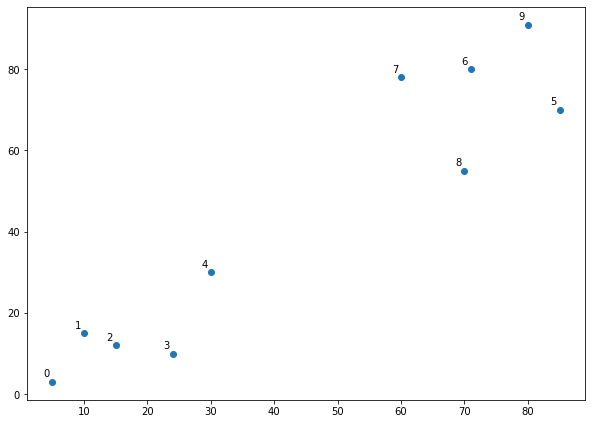

In [51]:
# Example array
arr = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

labels = range(len(arr))
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(arr[:,0],arr[:,1], label='True Position')

for label, x, y in zip(labels, arr[:, 0], arr[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

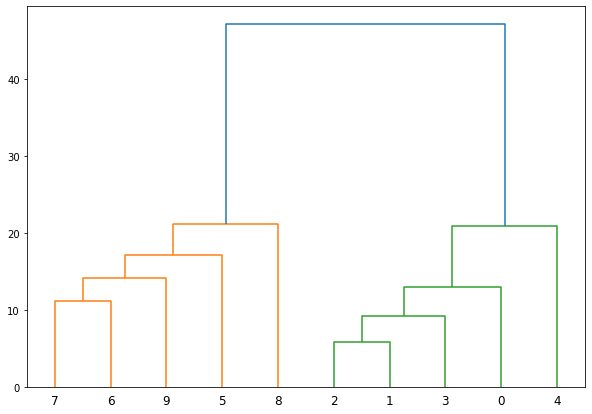

In [52]:
## scipy library for dendrograms
# https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(arr, 'single')

labelList = range(len(arr))

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(arr)
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


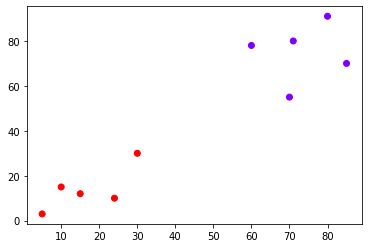

In [54]:
_ = plt.scatter(arr[:,0],arr[:,1], c=cluster.labels_, cmap='rainbow')

## Music data mining hierarchical clustering
Music Genre Dataset (.csv) download: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

In [55]:
# Load data
genre_data = pd.read_csv('features_30_sec.csv') # 10 genres 
print("Data shape:", genre_data.shape)

Data shape: (1000, 60)


In [56]:
genre_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [57]:
data = genre_data.iloc[:, 2:4].values
data

array([[0.35008812, 0.08875657],
       [0.34091359, 0.09498025],
       [0.36363718, 0.0852752 ],
       ...,
       [0.43214202, 0.0752685 ],
       [0.36248457, 0.09150553],
       [0.35840133, 0.08588409]])

In [58]:
# Normalization
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data) 
print(scaled)

[[0.36227871 0.69546819]
 [0.34362165 0.79339231]
 [0.38983171 0.6406919 ]
 ...
 [0.52914126 0.48324551]
 [0.3874878  0.73872059]
 [0.37918422 0.65027238]]


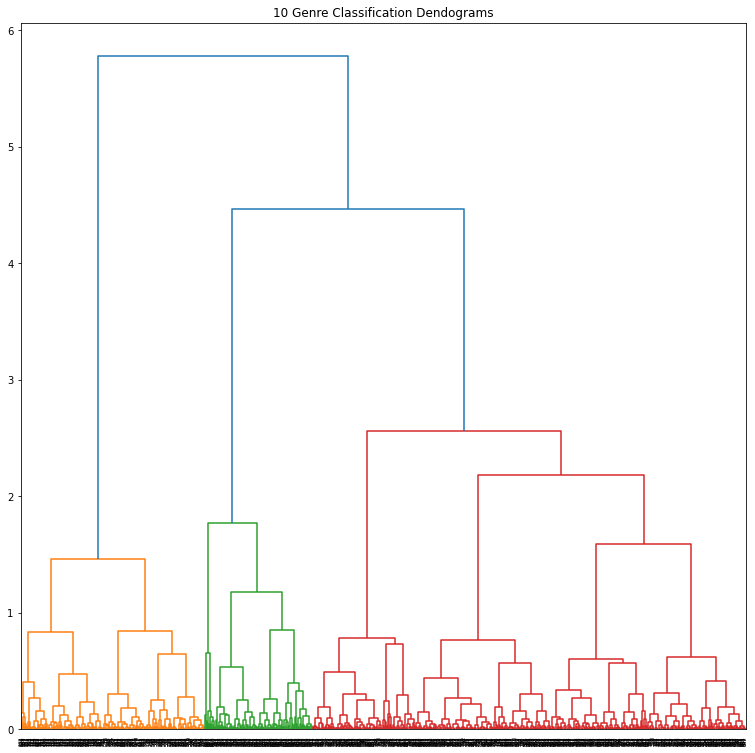

In [59]:
# Dendogram library
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(13, 13))
plt.title("10 Genre Classification Dendograms")
dend = shc.dendrogram(shc.linkage(scaled, method='ward'))

In [60]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
_ = cluster.fit_predict(scaled)

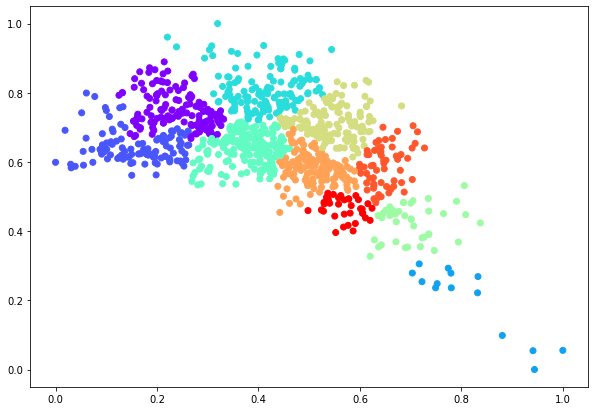

In [61]:
plt.figure(figsize=(10, 7))
_ = plt.scatter(scaled[:,0], scaled[:,1], c=cluster.labels_, cmap='rainbow')

## K-Means Clustering
The K-Means algorithm is an unsupervised clustering algorithm. It takes a bunch of unlabeled points and attempts to group them into “K” number of clusters. 

<br>K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

<br>The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

<br>In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

In [62]:
# Create dataset
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)
t.shape


(1, 1500)

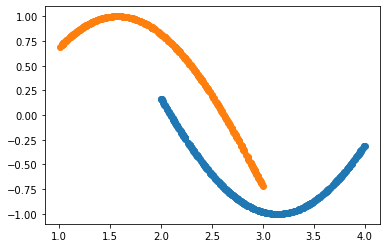

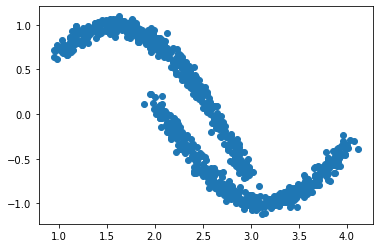

In [63]:
# Generate sample data
n_samples = 500
np.random.seed(0)
sin_x = np.random.uniform(low=1, high=3, size=(1, n_samples))
cos_x = np.random.uniform(low=2, high=4, size=(1, n_samples))
c = 2 * (np.cos(cos_x) + 0.5)
s = 2 * (np.sin(sin_x) - 0.5)

plt.scatter(cos_x, c)
plt.scatter(sin_x, s)
plt.show()

data1 = np.concatenate((cos_x, c))
data2 = np.concatenate((sin_x, s))
data = np.concatenate((data1, data2), axis=1)
data += .05 * np.random.randn(2, 2 * n_samples)
plt.scatter(data[0, :], data[1, :])
plt.show()
data = data.T


ward linkage


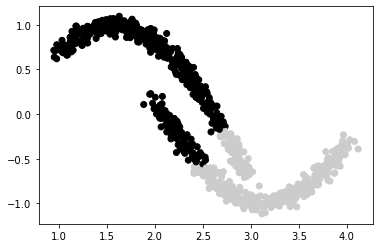

complete linkage


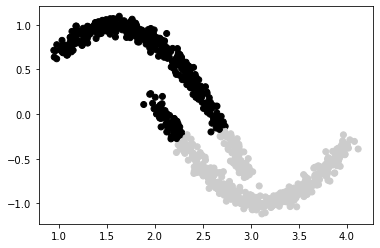

average linkage


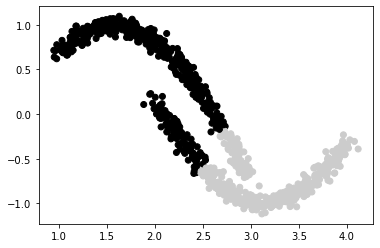

single linkage


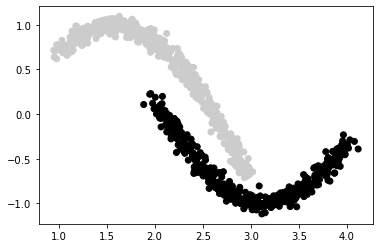

In [64]:
linkages = ['ward', 'complete', 'average', 'single']
linkages = np.array(linkages)

for i in range(len(linkages)):
    print(linkages[i],"linkage")
    model = AgglomerativeClustering(linkage=linkages[i], n_clusters=2)
    model.fit(data)
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
    plt.show()


K-Means++


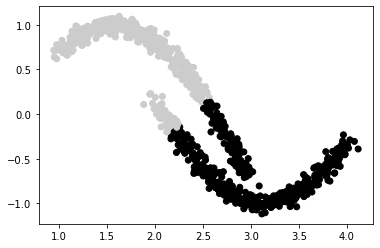

In [65]:
from sklearn.cluster import KMeans
print("K-Means++")
kmeans = KMeans(n_init=10, n_clusters=2, max_iter=1, random_state=0).fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap=plt.cm.nipy_spectral)
plt.show()

In [66]:
# Dataset info : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
genre_data = pd.read_csv('features_30_sec.csv') # 10 genres 
print("Data shape:",genre_data.shape)

Data shape: (1000, 60)


In [67]:
genre_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [68]:
# Extract certain values from the genre data 
g_data = genre_data.iloc[:, 2:4].values
data

# Normalization
scaler = MinMaxScaler()
scaled = scaler.fit_transform(g_data)
print(scaled)

[[0.36227871 0.69546819]
 [0.34362165 0.79339231]
 [0.38983171 0.6406919 ]
 ...
 [0.52914126 0.48324551]
 [0.3874878  0.73872059]
 [0.37918422 0.65027238]]


c:\tools\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


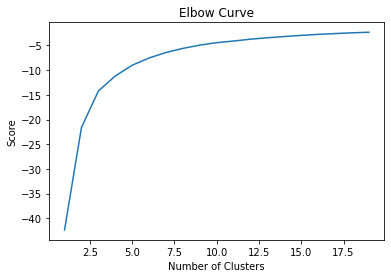

In [69]:
# Finding the optimum number of clusters for k-means clustering
Nc = range(1, 20)
kmeans = [KMeans(n_init=10, n_clusters=i) for i in Nc]
score = [kmeans[i].fit(scaled).score(scaled) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [70]:
model = KMeans(n_init = 10, n_clusters = 10)
model.fit(scaled)

KMeans(n_clusters=10)

In [71]:
model.cluster_centers_

array([[0.30463786, 0.66646991],
       [0.66964884, 0.43670634],
       [0.42861936, 0.63542652],
       [0.20797871, 0.78392669],
       [0.54256193, 0.7259431 ],
       [0.14439933, 0.64143874],
       [0.40988595, 0.80560708],
       [0.82241909, 0.19407954],
       [0.63317932, 0.61254788],
       [0.52671282, 0.54757501]])

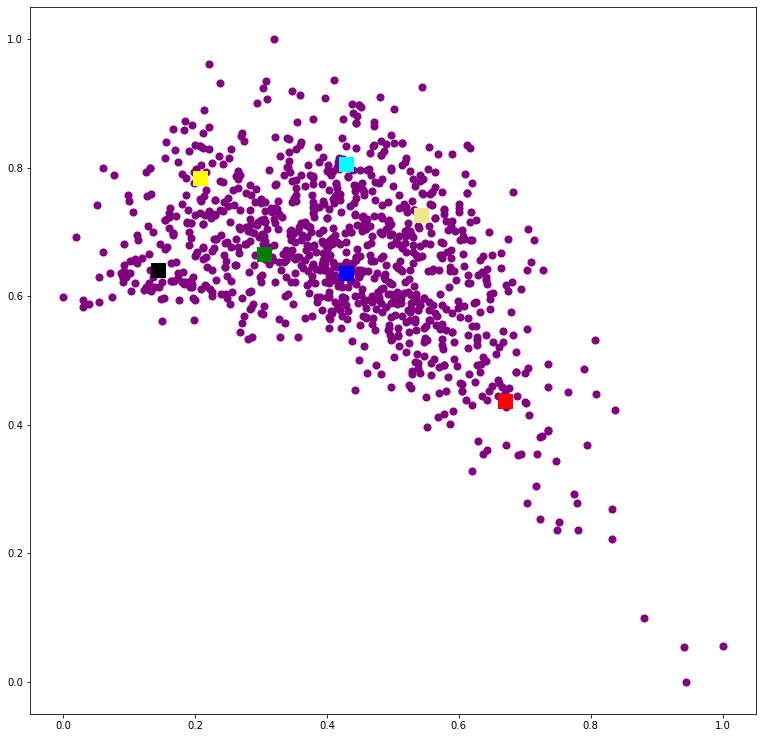

In [72]:
cluster_loc=model.cluster_centers_
plt.figure(figsize=(13, 13))
plt.scatter(scaled[ : , 0], scaled[ : , 1], s =50, c='purple')
plt.scatter(cluster_loc[0][0], cluster_loc[0][1], s=200, c='green', marker='s')
plt.scatter(cluster_loc[1][0], cluster_loc[1][1], s=200, c='red', marker='s')
plt.scatter(cluster_loc[2][0], cluster_loc[2][1], s=200, c='blue', marker='s')
plt.scatter(cluster_loc[3][0], cluster_loc[3][1], s=200, c='yellow', marker='s')
plt.scatter(cluster_loc[4][0], cluster_loc[4][1], s=200, c='khaki', marker='s')
plt.scatter(cluster_loc[5][0], cluster_loc[5][1], s=200, c='black', marker='s')
plt.scatter(cluster_loc[2][0], cluster_loc[6][1], s=200, c='cyan', marker='s')
plt.show()